This project aims at predicting the curve of global coronavirus cases as days progress using the already available number of cases per day over the past few months. We use polynomial regression of degree 3 to try to fit the prediction curve to the ground truth.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('coronaCases.csv')

In [3]:
df.head() # The dates in the original dataset have been converted to natural numbers to make it easier.

,id,cases
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44


In [5]:
x = np.array(df['id']).reshape(-1,1)
y = np.array(df['cases']).reshape(-1,1)

In [11]:
features = pf(3)
x = features.fit_transform(x)  # To generate features upto degree 3 for the feature 'x'
x

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01, 1.2500000e+02],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02],
       [1.0000000e+00, 7.0000000e+00, 4.9000000e+01, 3.4300000e+02],
       [1.0000000e+00, 8.0000000e+00, 6.4000000e+01, 5.1200000e+02],
       [1.0000000e+00, 9.0000000e+00, 8.1000000e+01, 7.2900000e+02],
       [1.0000000e+00, 1.0000000e+01, 1.0000000e+02, 1.0000000e+03],
       [1.0000000e+00, 1.1000000e+01, 1.2100000e+02, 1.3310000e+03],
       [1.0000000e+00, 1.2000000e+01, 1.4400000e+02, 1.7280000e+03],
       [1.0000000e+00, 1.3000000e+01, 1.6900000e+02, 2.1970000e+03],
       [1.0000000e+00, 1.4000000e+01, 1.9600000e+02, 2.7440000e+03],
       [1.0000000e+00, 1.5000000e+

In [13]:
model = LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
accuracy

0.9991804334620576

In [14]:
pred = model.predict(x)
y

array([[      27],
       [      27],
       [      27],
       [      44],
       [      44],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      60],
       [      60],
       [      61],
       [      61],
       [      66],
       [      83],
       [     219],
       [     239],
       [     392],
       [     534],
       [     631],
       [     897],
       [    1350],
       [    2023],
       [    2820],
       [    4587],
       [    6067],
       [    7823],
       [    9824],
       [   11946],
       [   14554],
       [   17372],
       [   20615],
       [   24523],
       [   28274],
       [   31492],
       [   34934],
       [   37552],
       [   40544],
       [   43106],
       [   45178],
       [   60329],
       [   64544],
       [   67104],
       [   69266],
       [   71333],
       [   73328],
       [   75192],
       [   75724],
       [   7

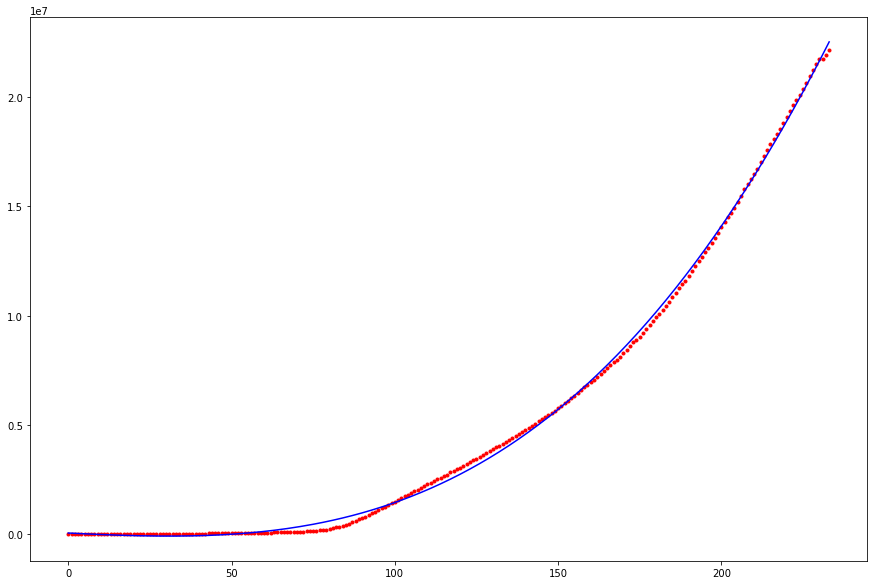

In [21]:
plt.figure(figsize=(15,10))
plt.plot(y,'.r')
plt.plot(pred,'-b')

Prediction – Cases after 15 days:27.21 Million


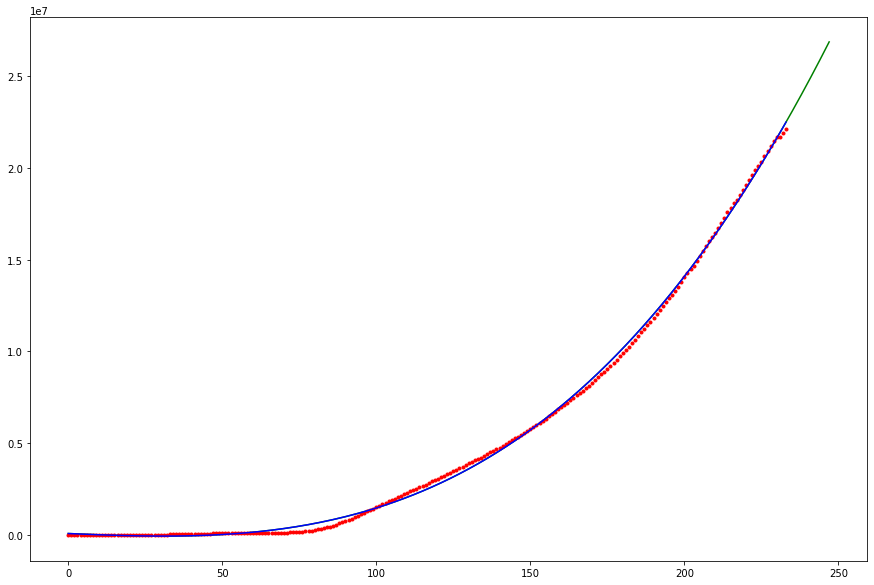

In [25]:
days = 15 # No. of days in advance to predict
print(f'Prediction – Cases after {days} days:',end='')
print(round(int(model.predict(features.fit_transform([[234+days]])))/1000000,2),'Million')

x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = model.predict(features.fit_transform(x1))

plt.figure(figsize=(15,10))

plt.plot(y,'.r')
plt.plot(pred,'-b')
plt.plot(y1,'-g')

The above graph shows the ground truth (in red), the fitted curve (in blue) and the extrapolated prediction (in green). It is visible that our model fits the data pretty well and hence, the prediction can be trusted.